# Introducción

Se provee un archivo con la siguiente estructura:
  * **Item_Identifier:** nombre o identificador del producto 
  * **Item_Weight:** peso del producto en gramos 
  * **Item_Fat_Content:** clasificación del producto en términos de grasas contenidas en él. 
  * **Item_Visibility:** scoring de visibilidad del producto: medida que hace referencia al conocimiento del producto en el consumidor. ¿Qué tan fácil puede ser encontrado el producto? 
  * **Item_Type:** tipo de producto 
  * **Item_MRP:** máximum retailed price. Precio calculado por el fabricante que indica el precio más alto que se puede cobrar por el producto. 
  * **Outlet_Identifier:** identificador de la tienda 
  * **Outlet_Establishment_Year:** año de lanzamiento de la tienda 
  * **Outlet_Size:** tamaño de la tienda 
  * **Outlet_Location_Type:** clasificación de las tiendas según ubicación 
  * **Outlet_Type:** tipo de tienda 
  * **Item_Outlet_Sales:** ventas del producto en cada observacion

Asunciones 
  * La categoría del producto podría tener cierto impacto en las ventas: productos de consumo general se venden más que bebidas alcohólicas.
  * El tipo de tienda y su ubicación es importante para las ventas. 
  * El tamaño de la tienda puede ser importante

# Carga y limpieza

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as st
%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = (10.0, 6.0)

In [3]:
# for reproducibility
np.random.seed(1416)

In [4]:
data = pd.read_csv("../input/BigMart.csv")

In [5]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales;;;
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138;;;
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228;;;
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.27;;;
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.38;;;
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052;;;


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
Item_Identifier              14204 non-null object
Item_Weight                  11765 non-null float64
Item_Fat_Content             14204 non-null object
Item_Visibility              14204 non-null float64
Item_Type                    14204 non-null object
Item_MRP                     14204 non-null float64
Outlet_Identifier            14204 non-null object
Outlet_Establishment_Year    14204 non-null int64
Outlet_Size                  10188 non-null object
Outlet_Location_Type         14204 non-null object
Outlet_Type                  14204 non-null object
Item_Outlet_Sales;;;         8523 non-null object
dtypes: float64(3), int64(1), object(8)
memory usage: 1.3+ MB


In [7]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,11765.000000,14204.000000,14204.000000,14204.000000
mean,12.792854,0.065953,141.004977,1997.830681
std,4.652502,0.051459,62.086938,8.371664
min,4.555000,0.000000,31.290000,1985.000000
25%,8.710000,0.027036,94.012000,1987.000000
50%,12.600000,0.054021,142.247000,1999.000000
75%,16.750000,0.094037,185.855600,2004.000000
max,21.350000,0.328391,266.888400,2009.000000


In [8]:
data.describe(include="object")

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales;;;
count,14204,14204,14204,14204,10188,14204,14204,8523
unique,1559,5,16,10,3,3,8,3493
top,FDX32,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1,958.752;;;
freq,10,8485,2013,1559,4655,5583,5577,17


In [9]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales;;;'],
      dtype='object')

Tengo las siguientes columnas categóricas:
  * Item_Fat_Content
  * Item_Type
  * Outlet_Identifier
  * Outlet_Size
  * Outlet_Location_Type
  * Outlet_Type

In [10]:
cat_cols = [(x, data[x].unique()) for x in data.columns if len(data[x].unique())<30]
for col_name, col_values in cat_cols:
    print(col_name,"\n", col_values)

Item_Fat_Content 
 ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
Item_Type 
 ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
Outlet_Identifier 
 ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
Outlet_Establishment_Year 
 [1999 2009 1998 1987 1985 2002 2007 1997 2004]
Outlet_Size 
 ['Medium' nan 'High' 'Small']
Outlet_Location_Type 
 ['Tier 1' 'Tier 3' 'Tier 2']
Outlet_Type 
 ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3' 'Supermarket Type1;;;' 'Grocery Store;;;'
 'Supermarket Type3;;;' 'Supermarket Type2;;;']


Es necesario acomodoar las categorías "Item Fat Content" y "Outlet Type"

In [11]:
data["Outlet_Type"] = data["Outlet_Type"].str.rstrip(";")
data["Outlet_Type"].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [12]:
item_fat_dict = {"Low Fat": "LF", "low fat": "LF", "LF": "LF", "reg": "Reg", "Regular": "Reg"}
data["Item_Fat_Content"] = data["Item_Fat_Content"].map(item_fat_dict)

In [13]:
data["Item_Fat_Content"].unique()

array(['LF', 'Reg'], dtype=object)

Por otro lado la columna Item_Outlet_Sales debería ser númerica y por ahora es un string. 

In [14]:
data.rename({"Item_Outlet_Sales;;;": "Item_Outlet_Sales"}, axis=1, inplace=True)

In [15]:
data["Item_Outlet_Sales"] = data["Item_Outlet_Sales"].str.rstrip(";").astype(float)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
Item_Identifier              14204 non-null object
Item_Weight                  11765 non-null float64
Item_Fat_Content             14204 non-null object
Item_Visibility              14204 non-null float64
Item_Type                    14204 non-null object
Item_MRP                     14204 non-null float64
Outlet_Identifier            14204 non-null object
Outlet_Establishment_Year    14204 non-null int64
Outlet_Size                  10188 non-null object
Outlet_Location_Type         14204 non-null object
Outlet_Type                  14204 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


## Busco datos duplicados

In [17]:
data[data.duplicated()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


## Busco datos Faltantes

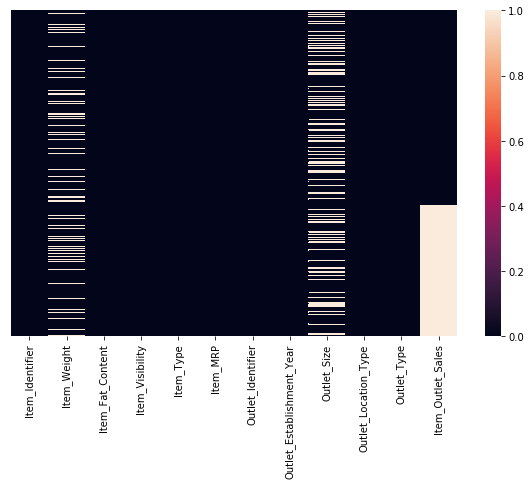

In [18]:
sns.heatmap(data.isna(), yticklabels=False)

Hay datos faltantes en 3 columnas, veo en que medida

In [19]:
mis_vals = [(x, sum(data[x].isna())/len(data)) for x in data.columns if data[x].isna().any()]
mis_vals

[('Item_Weight', 0.17171219374823993),
 ('Outlet_Size', 0.28273725711067305),
 ('Item_Outlet_Sales', 0.3999577583779217)]

Lo más importante aca es ver que la columna "Item Outlet Sales" tiene muchos un 40% de valores faltantes, y es nuestro dato a predecir, lo que nos pone ante un problema semi-supervisado

In [20]:
data[data["Item_Outlet_Sales"].isna()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5681 entries, 8523 to 14203
Data columns (total 12 columns):
Item_Identifier              5681 non-null object
Item_Weight                  4705 non-null float64
Item_Fat_Content             5681 non-null object
Item_Visibility              5681 non-null float64
Item_Type                    5681 non-null object
Item_MRP                     5681 non-null float64
Outlet_Identifier            5681 non-null object
Outlet_Establishment_Year    5681 non-null int64
Outlet_Size                  4075 non-null object
Outlet_Location_Type         5681 non-null object
Outlet_Type                  5681 non-null object
Item_Outlet_Sales            0 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 577.0+ KB


# Analisis y visualización

## Chequeo de asunciones

### 1. La categoría del producto puede tener impacto en las ventas

In [21]:
def get_item_sales_by(groupby="Item_Type"):
    return data.groupby(groupby,sort=True)["Item_Outlet_Sales"]\
               .sum().sort_values(ascending=False).reset_index()

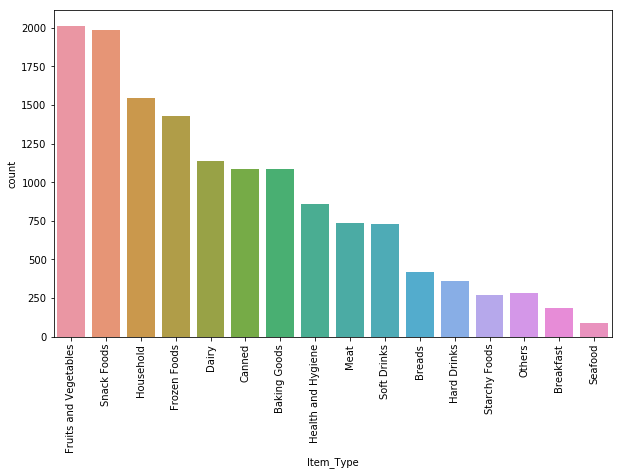

In [22]:
sns.countplot(x="Item_Type", data=data, order=get_item_sales_by()["Item_Type"])
_ = plt.xticks(rotation=90)

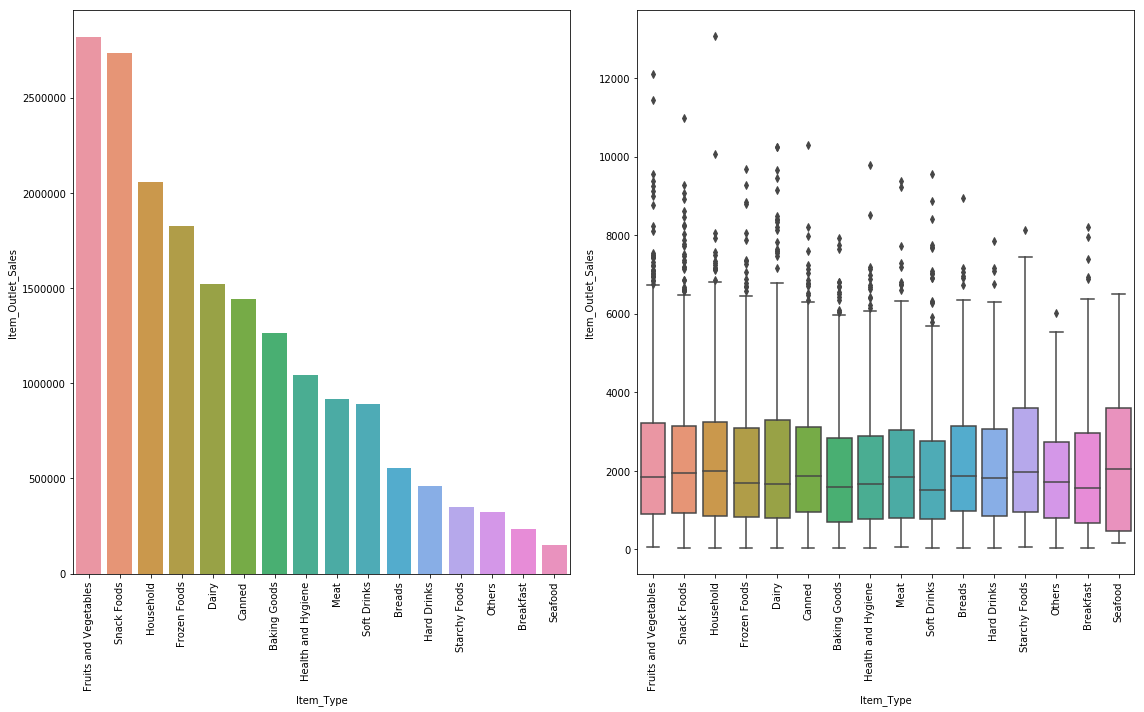

In [23]:
f, (ax1, ax2)= plt.subplots(1,2, figsize=(16,10))
sns.barplot(x="Item_Type", y="Item_Outlet_Sales", data=get_item_sales_by(), ax=ax1)
_ = plt.setp(ax1.xaxis.get_majorticklabels(), rotation=90)
sns.boxplot(x="Item_Type", y="Item_Outlet_Sales", data=data, order=get_item_sales_by()["Item_Type"])
_ = plt.setp(ax2.xaxis.get_majorticklabels(), rotation=90)
plt.tight_layout()

Vemos que la categoría del producto impacta directamente en en el volumen total de las ventas. Las items básicos como frutas y verduras, snacks, households y lacteos son los que más se consumen.

En promedio todos los productos aportan la misma cantidad de dinero por transacción, pero hay productos que generan más transacciones que el resto


In [24]:
dmap = {
    'Dairy': "Food", 
    'Soft Drinks': "Drinks",
    'Meat': "Food",
    'Fruits and Vegetables': "Food",
    'Household': "Others", 
    'Baking Goods': "Food",
    'Snack Foods': "Food",
    'Frozen Foods': "Food",
    'Breakfast': "Food", 
    'Health and Hygiene': "Others",
    'Hard Drinks': "Drinks",
    'Canned': "Food",
    'Breads': "Food",
    'Starchy Foods': "Food",
    'Others': "Others",
    'Seafood': "Food",
}
data["Item_Type_cat"] = data["Item_Type"].map(dmap)

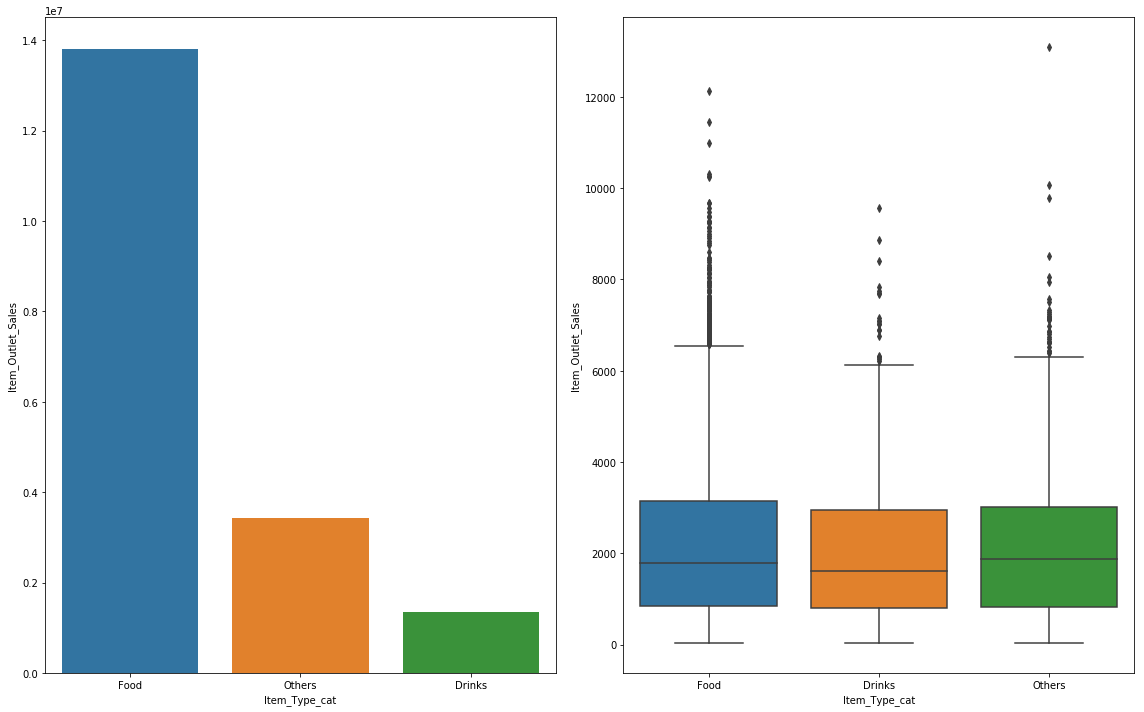

In [25]:
f, (ax1, ax2)= plt.subplots(1,2, figsize=(16,10))
sns.barplot(x="Item_Type_cat", y="Item_Outlet_Sales", data=get_item_sales_by("Item_Type_cat"), ax=ax1)
sns.boxplot(x="Item_Type_cat", y="Item_Outlet_Sales", data=data)
plt.tight_layout()

Tratando de agrupar en grupos más grandes no obtuvimos una mejor diferencia que en los tipos de items que vienen en el dataset. Que pasa si tratamos de sub dividir esos grupos utilizando los Item Identifier?

Son muchos por lo que vamos a tomar algunos y ver que pasa

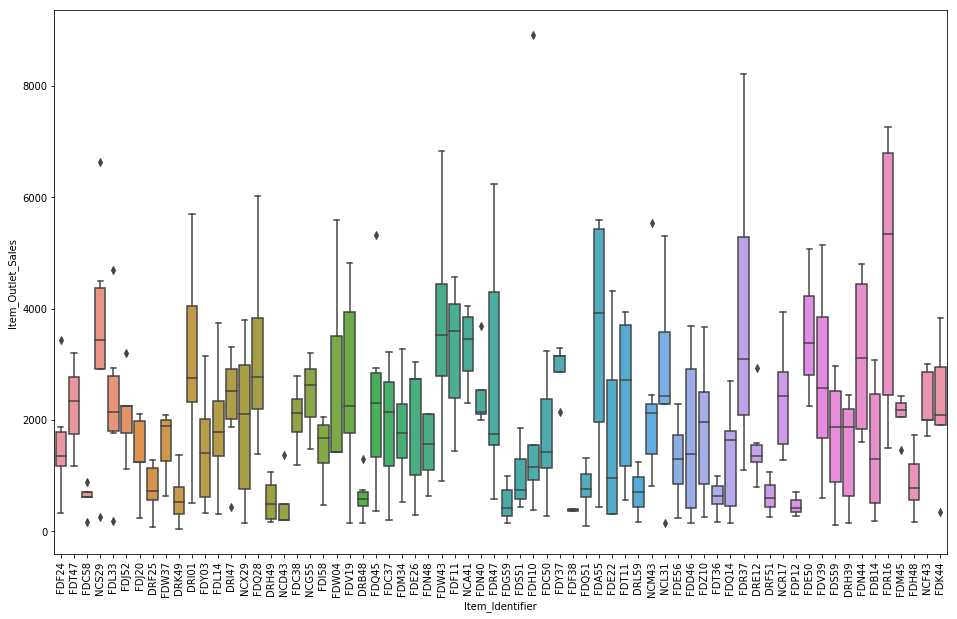

In [26]:
sample_idx = data["Item_Identifier"].unique()\
            [np.random.randint(0, len(data["Item_Identifier"].unique()), 70)]

data_aux = data[["Item_Identifier", "Item_Outlet_Sales"]]\
            .set_index("Item_Identifier").loc[sample_idx]
#data_aux.head()
plt.figure(figsize=(16,10))
sns.boxplot(x=data_aux.index, y="Item_Outlet_Sales", data=data_aux)
_ = plt.xticks(rotation=90)

Notamos que al dividirlos por identificador muchos productos comienza a diferenciarse entre si, pero por otro lado corremos el riesgo de que tenemos pocas muestras en el grupo 

### 2. El tipo de tienda y su ubicación importan en las ventas

In [27]:
pd.crosstab(index=data["Outlet_Type"], columns=data["Outlet_Identifier"], margins=True)

Outlet_Identifier,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049,All
Outlet_Type,,,,,,,,,,,
Grocery Store,925,0,0,0,880,0,0,0,0,0,1805
Supermarket Type1,0,1553,1543,0,0,0,1550,1548,1550,1550,9294
Supermarket Type2,0,0,0,1546,0,0,0,0,0,0,1546
Supermarket Type3,0,0,0,0,0,1559,0,0,0,0,1559
All,925,1553,1543,1546,880,1559,1550,1548,1550,1550,14204


Vemos que hay:
  * 2 tiendas "Grocery Store"
  * 6 tiendas "Supermarket Type1"
  * 1 tienda  "Supermarket Type2"
  * 1 tienda  "Supermarket Type3"

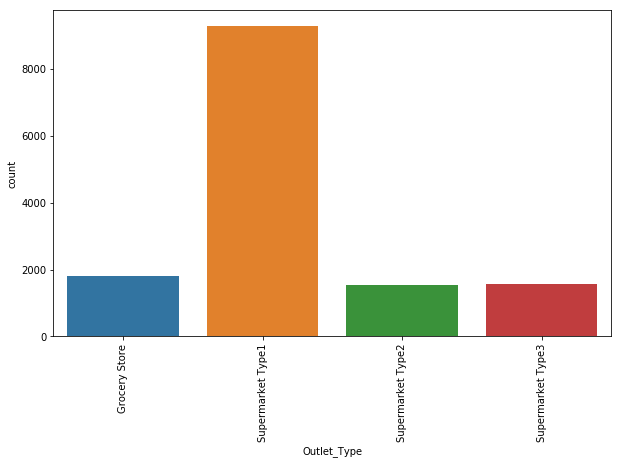

In [28]:
type_order = data["Outlet_Type"].unique()
type_order.sort()
sns.countplot(x="Outlet_Type", data=data, order=type_order)
_ = plt.xticks(rotation=90)

La cantidad de transacciones es los supermercados tipo 2 es mayor, pero como sabes también hay más cantidad de tiendas de ese tipo.
Veamos ahora cuan grande es el volumen de venta para cada tienda, identificando tambien el tipo de tienda

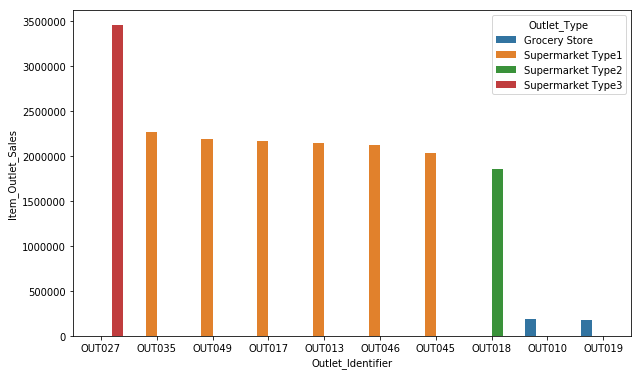

In [29]:
data_by_id = data.groupby(by=["Outlet_Identifier","Outlet_Type"])["Item_Outlet_Sales"]\
           .sum().sort_values(ascending=False).reset_index()

sns.barplot(x="Outlet_Identifier", y="Item_Outlet_Sales", data=data_by_id, hue="Outlet_Type", 
            hue_order=type_order)


Vemos que la tienda que más ingresos tiene es la única que es supermercado tipo 3

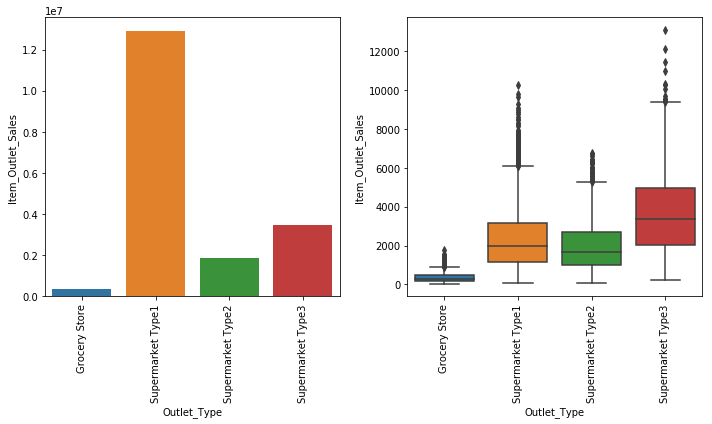

In [30]:
f, (ax1, ax2) = plt.subplots(1,2)
sns.barplot(x="Outlet_Type", y="Item_Outlet_Sales", data=get_item_sales_by("Outlet_Type"), 
            order=type_order, ax=ax1)
_ = plt.setp(ax1.xaxis.get_majorticklabels(), rotation=90)
sns.boxplot(x="Outlet_Type", y="Item_Outlet_Sales", data=data, order=type_order, ax=ax2)
_ = plt.setp(ax2.xaxis.get_majorticklabels(), rotation=90)
plt.tight_layout()

Vemos que el Supermarket Type 1 lidera ampliamente en el volumen de ventas, pero se debe a que hay muchos más mercados de ese tipo que del resto.

Por otro lado, mirando el boxplots, vemos que el tipo de tiendo influye claramente en como son las ventas. De los que más venden en promedio a los que menos, tenemos
  1. Supermarket type 3
  2. Supermarket type 1
  3. Supermarket type 2
  4. Grocery Store

Vemos como afecta la ubicacion

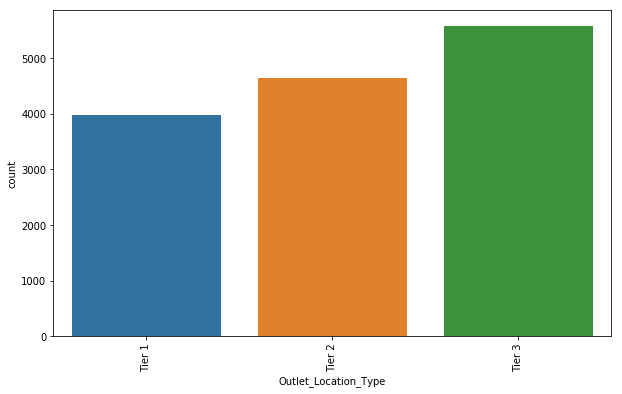

In [31]:
loc_order = data["Outlet_Location_Type"].unique()
loc_order.sort()

sns.countplot(x="Outlet_Location_Type", data=data, order=loc_order)
_ = plt.xticks(rotation=90)

In [32]:
pd.crosstab(index=data["Outlet_Location_Type"], columns=data["Outlet_Identifier"], margins=True)

Outlet_Identifier,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049,All
Outlet_Location_Type,,,,,,,,,,,
Tier 1,0,0,0,0,880,0,0,0,1550,1550,3980
Tier 2,0,0,1543,0,0,0,1550,1548,0,0,4641
Tier 3,925,1553,0,1546,0,1559,0,0,0,0,5583
All,925,1553,1543,1546,880,1559,1550,1548,1550,1550,14204


In [33]:
pd.crosstab(index=data["Outlet_Location_Type"], columns=data["Outlet_Type"], margins=True)

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3,All
Outlet_Location_Type,,,,,
Tier 1,880,3100,0,0,3980
Tier 2,0,4641,0,0,4641
Tier 3,925,1553,1546,1559,5583
All,1805,9294,1546,1559,14204


Vemos que en el Tier 2 solo hay tiendas Supermercado Tipo 1, mientras que el nivel 3 tiene los 4 tipos de tiendas

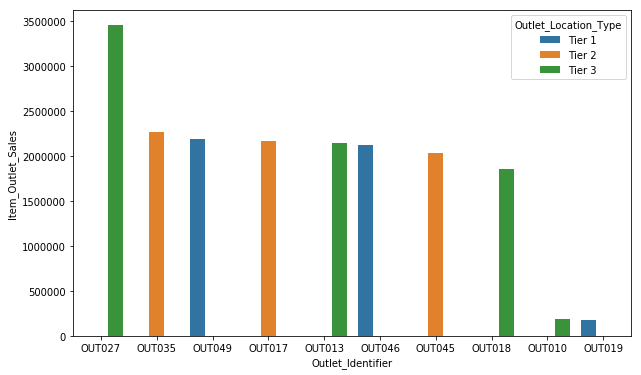

In [34]:
data_by = data.groupby(by=["Outlet_Identifier","Outlet_Location_Type"])["Item_Outlet_Sales"]\
           .sum().sort_values(ascending=False).reset_index()

sns.barplot(x="Outlet_Identifier", y="Item_Outlet_Sales", data=data_by, hue="Outlet_Location_Type",
           hue_order=loc_order)

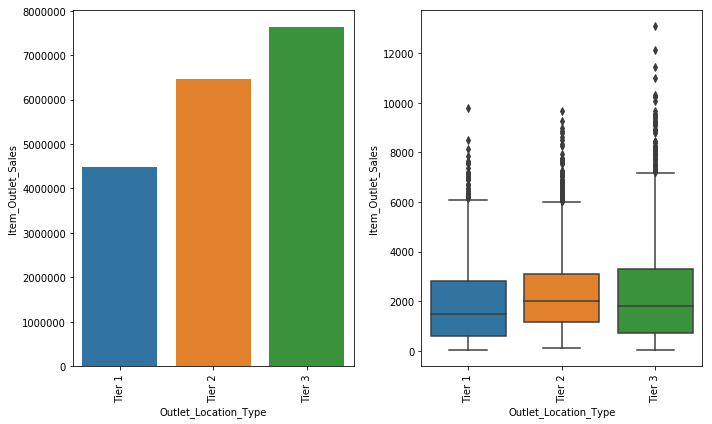

In [35]:
f, (ax1, ax2) = plt.subplots(1,2)
sns.barplot(x="Outlet_Location_Type", y="Item_Outlet_Sales", data=get_item_sales_by("Outlet_Location_Type"), 
            ax=ax1, order=loc_order)
_ = plt.setp(ax1.xaxis.get_majorticklabels(), rotation=90)
sns.boxplot(x="Outlet_Location_Type", y="Item_Outlet_Sales", data=data, ax=ax2, order=loc_order)
_ = plt.setp(ax2.xaxis.get_majorticklabels(), rotation=90)
plt.tight_layout()

El nivel 3 lidera el volumen de ventas pero es debido a que hay más mercados en ese nivel. Al mirar las distribuciones vemos que los mercados del nivel 2 superan un poco al resto.

Veamos como se distribuyen los tipos de tiempo en los niveles, y como son las ventas en cada caso

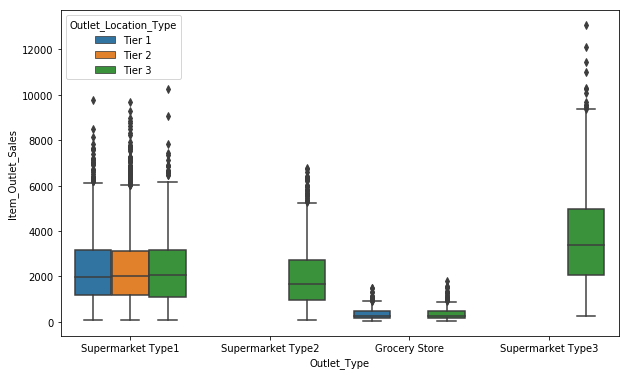

In [36]:
sns.boxplot(x="Outlet_Type", y="Item_Outlet_Sales", hue="Outlet_Location_Type",data=data,
            hue_order=loc_order)

Algunos puntos a observar:
  * Solo el supermercado tipo 1 esta en los 3 niveles. Las ventas son parejas en los 3 niveles
  * Los supermercados tipo 2 y 3 son exclusivos del nivel 3
  * Las grocery stores estan en los niveles 1 y 3. Las ventas son parejas en los 2 niveles

Es posible que las gorcery stores esten afectando mucho la media de los niveles 1 y 3? O la cantidad de estas tiendas es tan pequeño que no afecta tanto?

Veamos

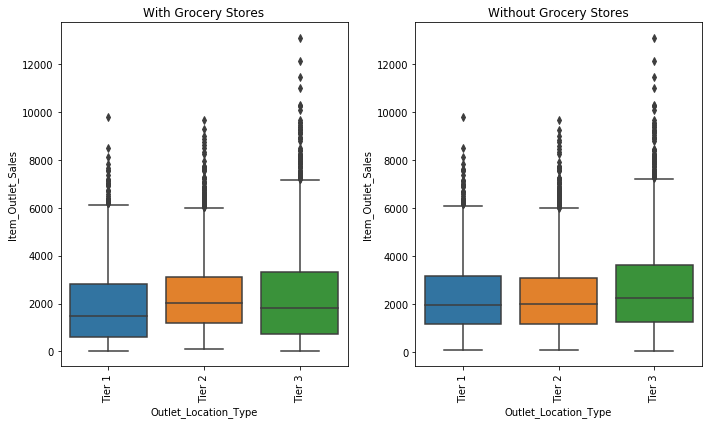

In [37]:
mask = data["Outlet_Type"] != "Grocery Store"

f, (ax1, ax2) = plt.subplots(1,2)
sns.boxplot(x="Outlet_Location_Type", y="Item_Outlet_Sales", data=data, 
            order=loc_order, ax=ax1)
_ = plt.setp(ax1.xaxis.get_majorticklabels(), rotation=90)
ax1.set_title("With Grocery Stores")
sns.boxplot(x="Outlet_Location_Type", y="Item_Outlet_Sales", data=data[mask], ax=ax2,
            order=loc_order)
_ = plt.setp(ax2.xaxis.get_majorticklabels(), rotation=90)
ax2.set_title("Without Grocery Stores")

plt.tight_layout()


### Tamaño de la tienda
Debemos tener en cuenta que "Outlet Size" tiene algunos valores faltantes

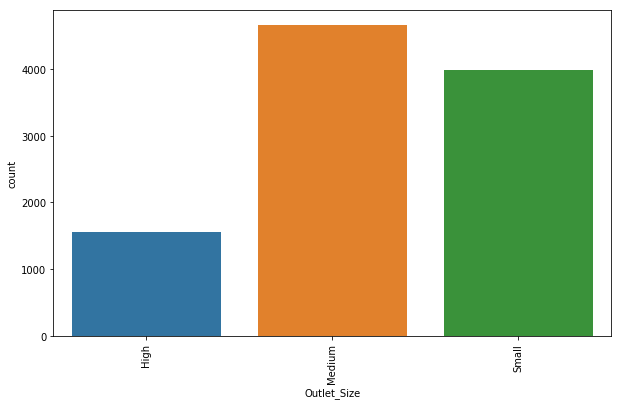

In [38]:
size_order = data["Outlet_Size"].dropna().unique()
size_order.sort()

sns.countplot(x="Outlet_Size", data=data, order=size_order)
_ = plt.xticks(rotation=90)

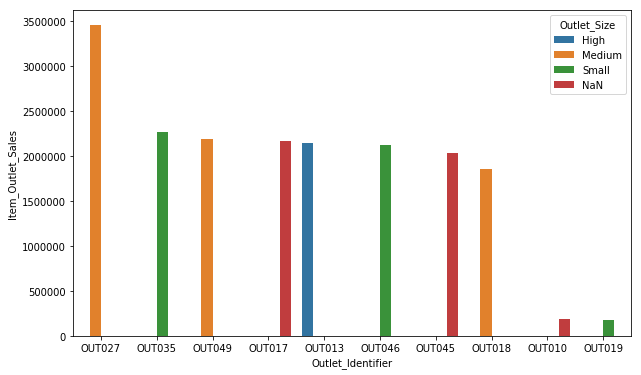

In [39]:
data_by = data.fillna({"Outlet_Size": "NaN"}).groupby(by=["Outlet_Identifier","Outlet_Size"])["Item_Outlet_Sales"]\
           .sum().sort_values(ascending=False).reset_index()

sns.barplot(x="Outlet_Identifier", y="Item_Outlet_Sales", data=data_by, hue="Outlet_Size",
           hue_order=size_order.tolist()+["NaN"],)

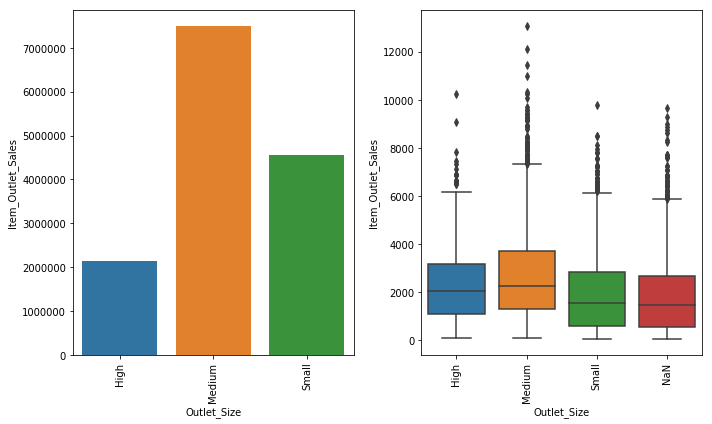

In [40]:
f, (ax1, ax2) = plt.subplots(1,2)
sns.barplot(x="Outlet_Size", y="Item_Outlet_Sales", data=get_item_sales_by("Outlet_Size"), 
            ax=ax1, order=size_order)
_ = plt.setp(ax1.xaxis.get_majorticklabels(), rotation=90)
sns.boxplot(x="Outlet_Size", y="Item_Outlet_Sales", data=data.fillna({"Outlet_Size": "NaN"})
            , ax=ax2, order=size_order.tolist()+["NaN"])
_ = plt.setp(ax2.xaxis.get_majorticklabels(), rotation=90)
plt.tight_layout()

Las tiendas de tamaño medio tienen mayor volumen de ventas, debido a que hay más tiendas de este tipo. En la media vemos que tambien aventajan al resto. 

Veamos como se relacionan con el tipo de tienda

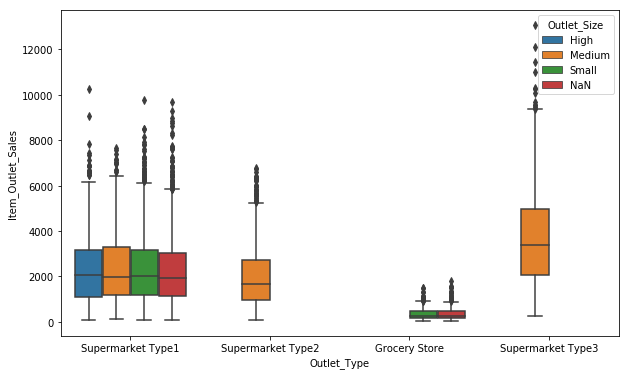

In [41]:
sns.boxplot(x="Outlet_Type", y="Item_Outlet_Sales", hue="Outlet_Size",
            data=data.fillna({"Outlet_Size": "NaN"}),
            hue_order=size_order.tolist()+["NaN"])

Es importante destacar que:
  * Solo hay Grocery Store pequeñas
  * Solo los supermercados tipo 1 pueden ser de tamaño grande
  * Los supermercado tipo 1 pueden ser de los 3 tamaños y que el tamaño no tiene gran impacto  en la distribucion de las ventas
  * Los supermercados tipo 2 y 3 solo hay de tamaño medio

### Relación tipo de tienda y tipo de producto

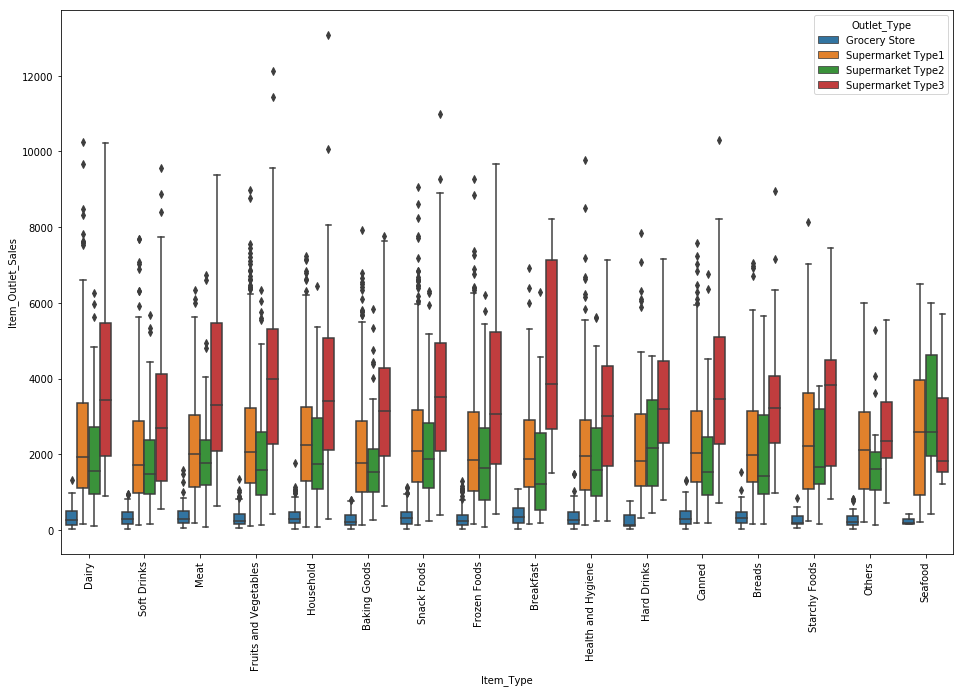

In [42]:
type_order = data["Outlet_Type"].unique()
type_order.sort()
plt.figure(figsize=(16,10))
sns.boxplot(x="Item_Type", y="Item_Outlet_Sales", data=data, hue="Outlet_Type", hue_order=type_order)
_ = plt.xticks(rotation=90)

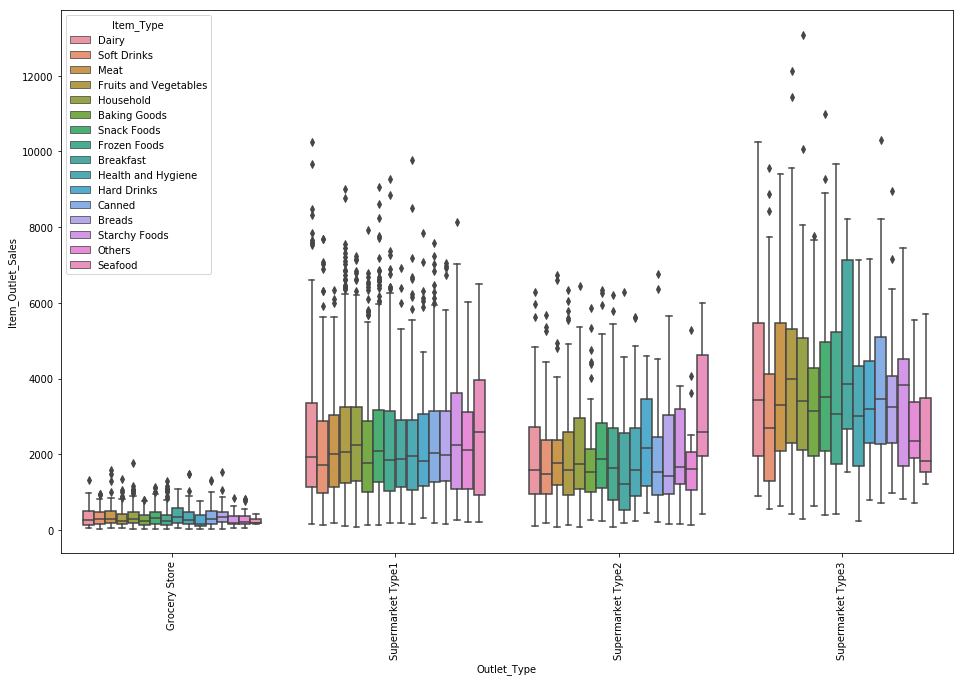

In [43]:
plt.figure(figsize=(16,10))
sns.boxplot(x="Outlet_Type", y="Item_Outlet_Sales", data=data, hue="Item_Type", order=type_order)
_ = plt.xticks(rotation=90)

Para la mayoría de los productos (tal vez a excepción solo de seafood) la gente prefiere ir a supermercados tipo 3, que recordemos son de tamaño medio y solo estan en el nivel 3

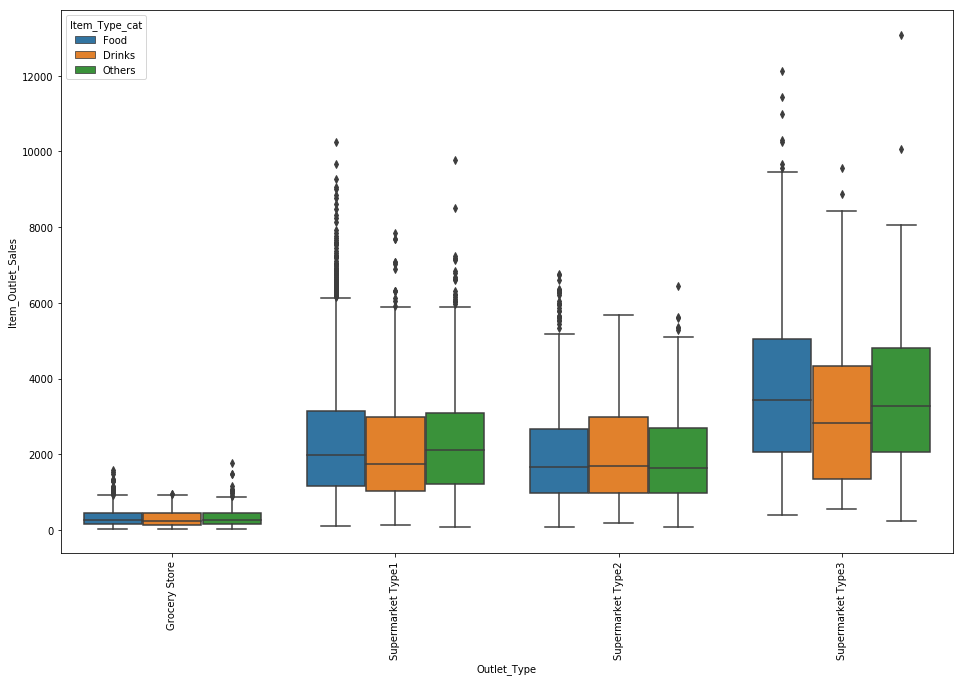

In [44]:
order = data["Outlet_Type"].unique()
order.sort()
plt.figure(figsize=(16,10))
sns.boxplot(x="Outlet_Type", y="Item_Outlet_Sales", data=data, hue="Item_Type_cat", order=order)
_ = plt.xticks(rotation=90)

Vemos que para comida y otros, la gente prefiere ir a supermercados tipos 3, luego a los tipo 1 y por último los de tipo2

Para las bebidas, los supermercados tipo 3 siguen siendo los más preferidos pero con menos diferencia. Además, para este caso los supermercados tipo 1 y 2 son practicamente iguales en preferencia

Por último en este apartado, veamos como es la venta de cada prodcuto de acuerdo a cada tienda en particular

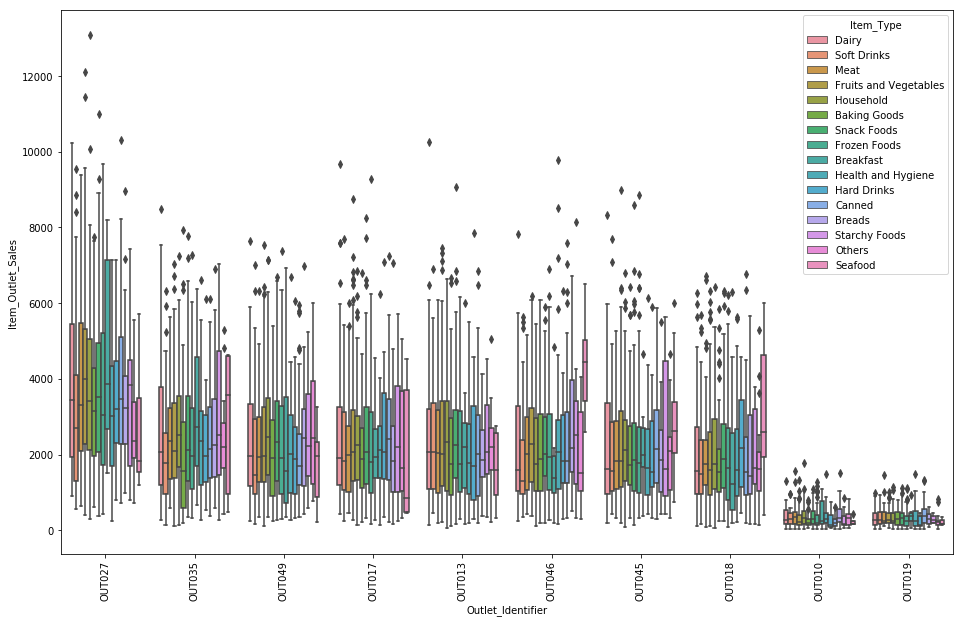

In [45]:
plt.figure(figsize=(16,10))
sns.boxplot(x="Outlet_Identifier", y="Item_Outlet_Sales", data=data, hue="Item_Type",
            order=data_by_id["Outlet_Identifier"])
_ = plt.xticks(rotation=90)

Vemos un poco lo que dijimos antes, que los supermercados tipo e (tienda OUT027) son los que más venden en promedio todo los tipos de productos, excepto en la categoria seafood donde la tiendas OUT046 sobresale

### Conclusion sobre las asunciones

De estos analasis podes establecer que:
  1. El tipo de no nos da mucha información sobre la distribución de las ventas, a menos que miremos en relación a alguna otra variable
  2. El tipo de tienda impacta en las ventas, así como lo hace el identificador de la tienda.
  3. La ubicación no nos aporta tanta información sobre las ventas
  4. El tamaño de la tienda nos aporta algo de información sobre las ventas
  5. La mayoría de los productos respetan la distribución de las ventas segun el tipo de tienda a excepcion del seafood

## Patrones y relaciones

Empezamos viendo rapidamente la relación entre los datos

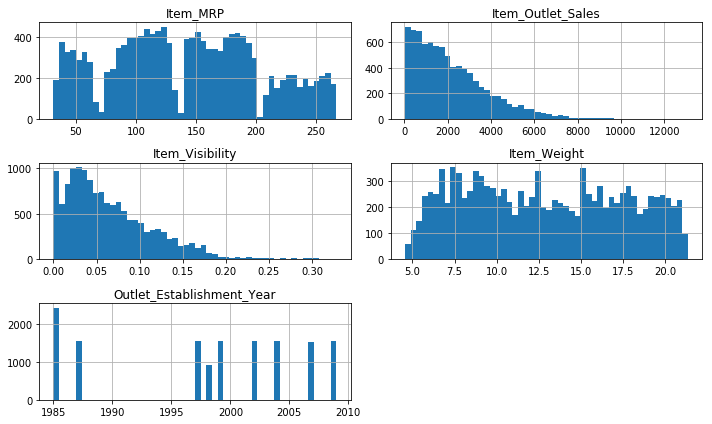

In [46]:
data.hist(bins=50)
plt.tight_layout()

/home/franco/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/franco/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


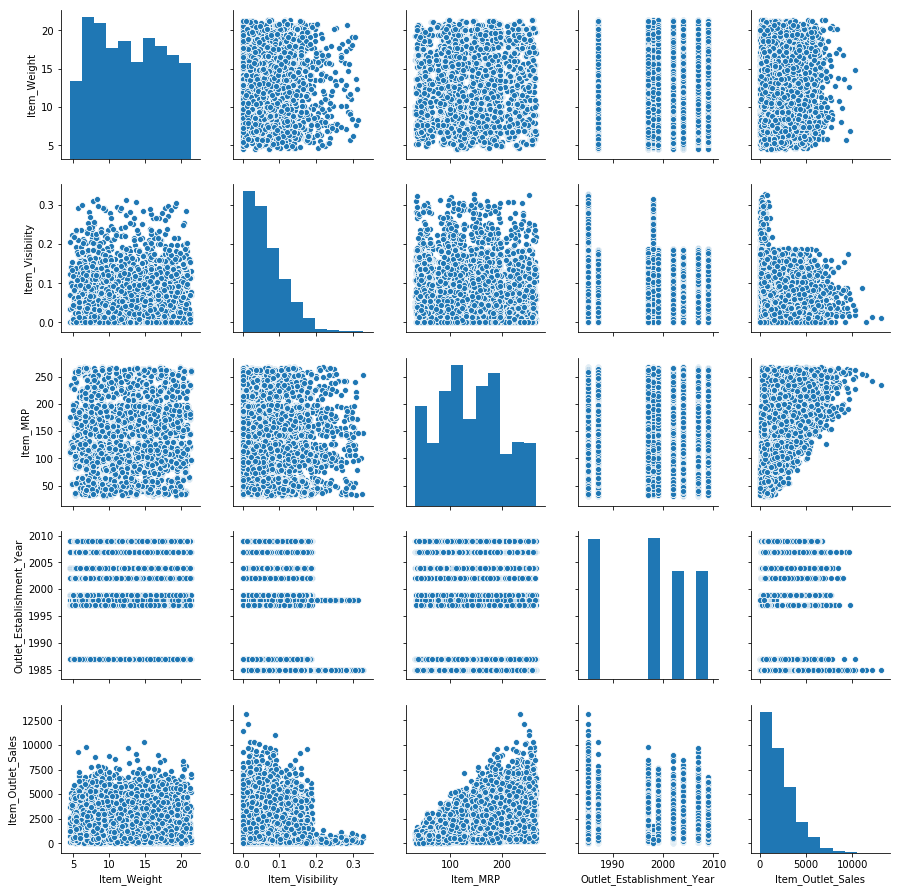

In [47]:
sns.pairplot(data)

A simple vista, vemos una relaciones prometedora entre las "Item Outlet Sales" con el "Item PRM". Y tal vez tambien con el "Item Visibility"

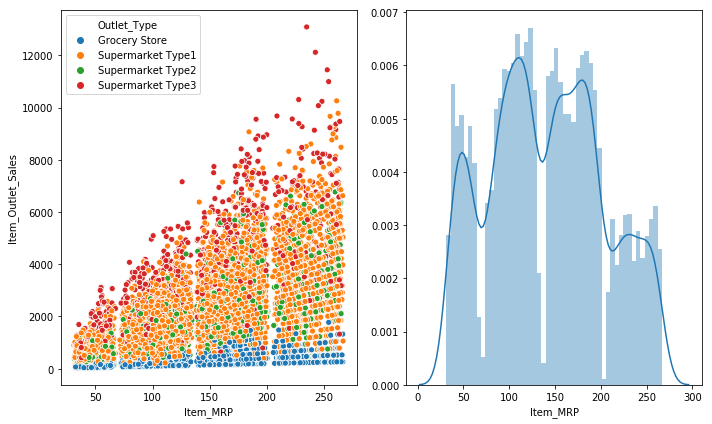

In [48]:
f, (ax1,ax2) = plt.subplots(1,2)
sns.scatterplot(x="Item_MRP", y="Item_Outlet_Sales", data=data, 
                hue="Outlet_Type", hue_order=type_order,ax=ax1)
sns.distplot(data["Item_MRP"], bins=50, ax=ax2)
plt.tight_layout()

Vemos que al aumentar el precio máximo al que el fabricante estima que se puede vender un producto, el volumen de venta también incrementa. Lo que tiene sentido ya que el prodcuto se esta vendiendo más caro.

Por otro lado, mirando la distribución, vemos que los productos parecen tener una division interna de 4 grupos. Donde los más caros se venden en menor cantidad que el resto.




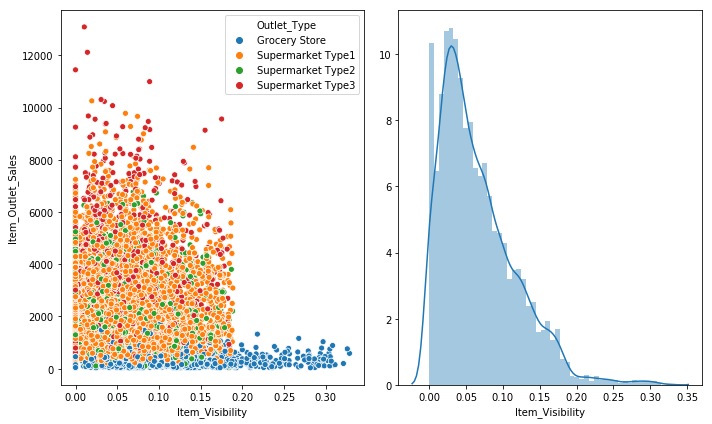

In [49]:
f, (ax1,ax2) = plt.subplots(1,2)
sns.scatterplot(x="Item_Visibility", y="Item_Outlet_Sales", data=data, 
                hue="Outlet_Type", hue_order=order, ax=ax1)
sns.distplot(data["Item_Visibility"], bins=50, ax=ax2)
plt.tight_layout()

Vemos que hay itemos con visibility igual a 0, pero que tienen ventas, es raro. Puede que sea necesario imputar o corregir el valor de visibility de esos items

Solo las Grocery Stores tienen items visibility superiores a 0.17

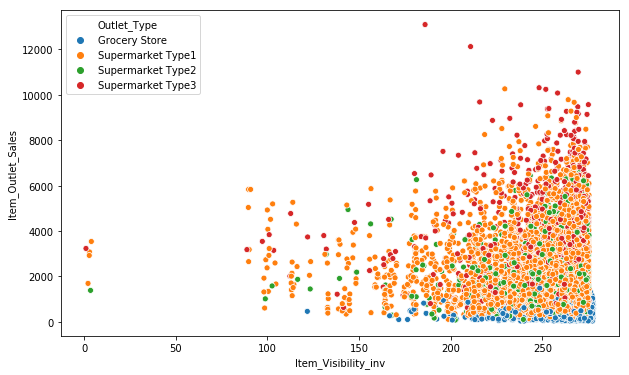

In [82]:
data["Item_Visibility_inv"] = 1/data["Item_Visibility"]
mask = data["Item_Visibility_inv"] != np.inf
max_noinf_val = data[mask]["Item_Visibility_inv"].max()
data["Item_Visibility_inv"].replace({np.inf: max_noinf_val})

data["Item_Visibility_inv"] = (max_noinf_val+1 - data["Item_Visibility_inv"])
#mask=data["Outlet_Type"] == "Grocery Store"
sns.scatterplot(x="Item_Visibility_inv", y="Item_Outlet_Sales", data=data, 
                hue="Outlet_Type", hue_order=order)

In [83]:
data["Item_Visibility_inv"].unique()

array([218.42813614, 228.87189154, 221.07830711, ..., 273.75045901,
       267.14375387, 271.19465075])

Despues de algunas transformaciones matematcias sobre esa columna, obtenemos una relacion más parecida similar a la de "Item MRP".

## Peso del Producto

/home/franco/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/franco/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/home/franco/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/franco/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


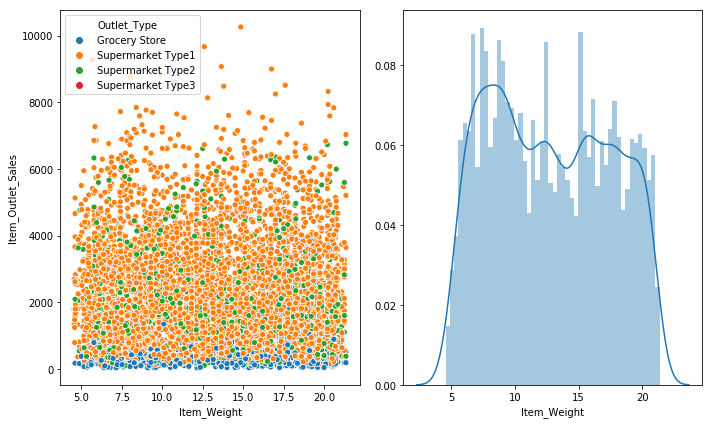

In [51]:
f, (ax1,ax2) = plt.subplots(1,2)
#mask=data["Outlet_Type"] == "Supermarket Type2"
sns.scatterplot(x="Item_Weight", y="Item_Outlet_Sales", data=data, 
                hue="Outlet_Type", hue_order=order, ax=ax1)
sns.distplot(data["Item_Weight"], bins=50, ax=ax2)
plt.tight_layout()

El peso de los items no aporta mcha información sobre como son las ventas de ese producto en si. 

Algo que podemos ver de este gráfico es que los supermercados de tipo 3, no tienen información sobre el peso de los productos

## Antiguedad de la tienda

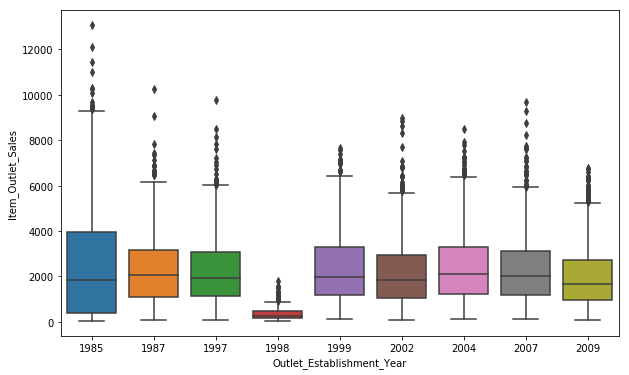

In [52]:
sns.boxplot(x="Outlet_Establishment_Year", y="Item_Outlet_Sales", data=data)

Tendran relacion con los tipos o tomanos de las tiendas?

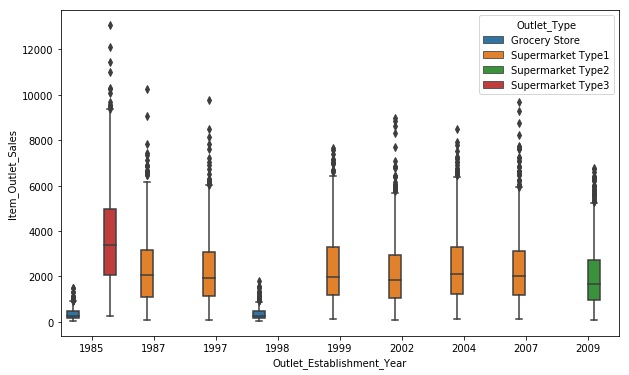

In [53]:
sns.boxplot(x="Outlet_Establishment_Year", y="Item_Outlet_Sales", data=data, 
            hue="Outlet_Type", hue_order=order)

In [54]:
pd.crosstab(index=data["Outlet_Type"], columns=data["Outlet_Establishment_Year"])

Outlet_Establishment_Year,1985,1987,1997,1998,1999,2002,2004,2007,2009
Outlet_Type,,,,,,,,,
Grocery Store,880,0,0,925,0,0,0,0,0
Supermarket Type1,0,1553,1550,0,1550,1548,1550,1543,0
Supermarket Type2,0,0,0,0,0,0,0,0,1546
Supermarket Type3,1559,0,0,0,0,0,0,0,0


Podemos decir que el tipo de tienda que más ventas promedio tiene (supermercado tipo 3) son los mercados más antiguos. 

Por otro lado el año 1985 presenta un rango intercuartilico grande ya que en ese año se crearon tiendas "supermercado tipo 3" y "grocery store", que son los extremos opuestos en cuanto a ventas promedio

Otro aspecto, es que los supermercados tipo2 aparecen recien en 2009



## Grasa de los alimentos

In [55]:
data["Item_Fat_Content"].unique()

array(['LF', 'Reg'], dtype=object)

De analizar los tipos de item, sabemos que hay algunos no comestibles, por lo que no tiene sentido que este categorizados como "Low Fat" o "Regular". Lo etiquetamos como Others

In [56]:
data["Item_Fat_Content"] = data.apply(lambda row: "NoTFood" if row["Item_Type_cat"] == "Others" 
                                      else row["Item_Fat_Content"],axis=1)


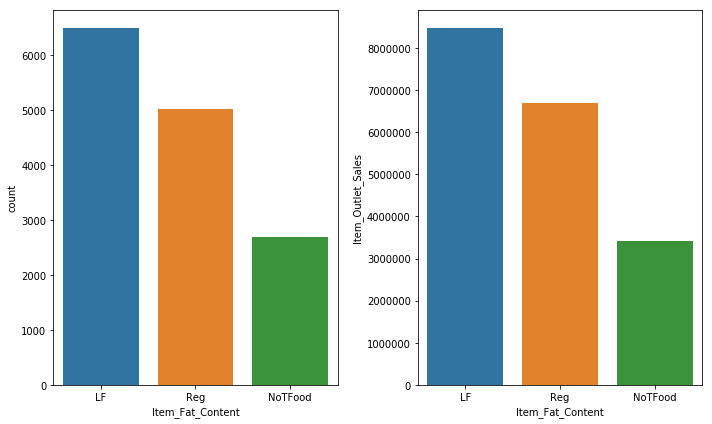

In [57]:
f, (ax1, ax2) = plt.subplots(1,2)
sns.countplot(x="Item_Fat_Content", data=data, ax=ax1)
sns.barplot(x="Item_Fat_Content", y="Item_Outlet_Sales",
            data=get_item_sales_by("Item_Fat_Content"), ax=ax2)
plt.tight_layout()

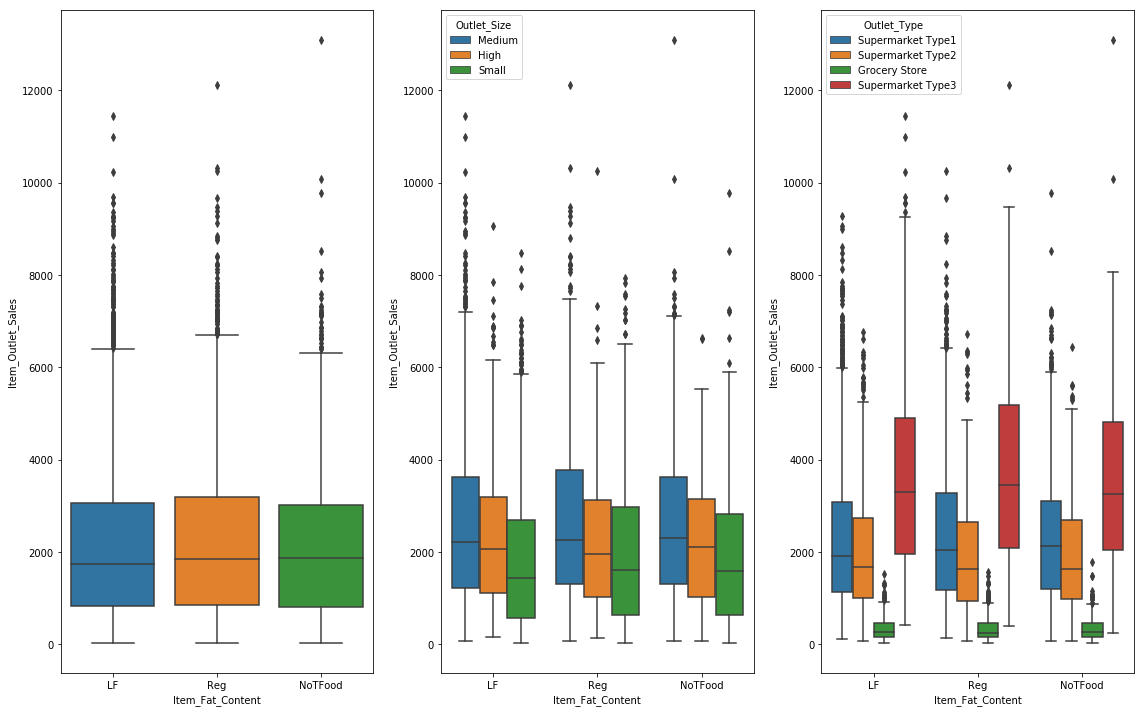

In [58]:
f, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(16,10))
sns.boxplot(x="Item_Fat_Content", y="Item_Outlet_Sales", data=data, ax=ax1)
sns.boxplot(x="Item_Fat_Content", y="Item_Outlet_Sales", data=data, 
            hue="Outlet_Size", ax=ax2)
sns.boxplot(x="Item_Fat_Content", y="Item_Outlet_Sales", data=data, 
            hue="Outlet_Type", ax=ax3)
plt.tight_layout()

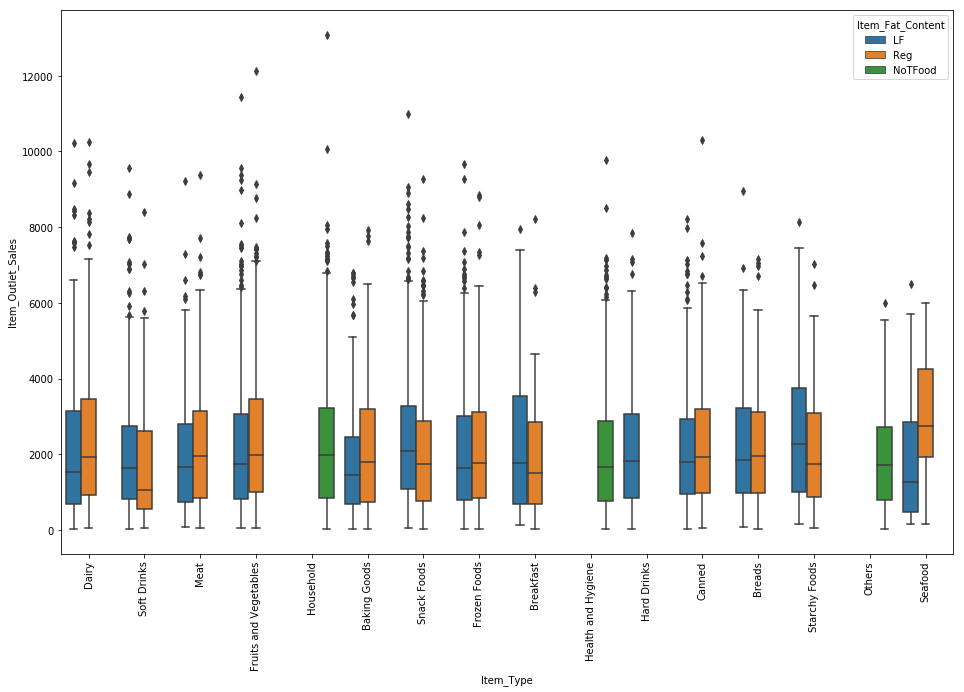

In [59]:
plt.figure(figsize=(16,10))
sns.boxplot(x="Item_Type", y="Item_Outlet_Sales", data=data, 
            hue="Item_Fat_Content")
_ = plt.xticks(rotation=90)

Diferenciar los items reducidos en grasa de los regulares es útil en algunos tipos de productos, como seafood

## Correlaciones

Antes de hacer la correlación agrego columnas númericas útiles y prometedoras que me aportan información sobre las ventas

In [60]:
outlet_type_dum = pd.get_dummies(data["Outlet_Type"])
data_extra = pd.concat([data,outlet_type_dum], axis=1)
data_extra.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_cat,Item_Visibility_inv,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,FDA15,9.30,LF,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,218.428136,0,1,0,0
1,DRC01,5.92,Reg,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,228.871892,0,0,1,0
2,FDN15,17.50,LF,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,221.078307,0,1,0,0
3,FDX07,19.20,Reg,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,Food,-inf,1,0,0,0
4,NCD19,8.93,NoTFood,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Others,-inf,0,1,0,0


In [61]:
corr_mat = data_extra.corr()
corr_mat["Item_Outlet_Sales"].sort_values(ascending=False)

Item_Outlet_Sales            1.000000
Item_MRP                     0.567574
Supermarket Type3            0.311192
Supermarket Type1            0.108765
Item_Weight                  0.014123
Supermarket Type2           -0.038059
Outlet_Establishment_Year   -0.049135
Item_Visibility_inv         -0.061737
Item_Visibility             -0.128625
Grocery Store               -0.411727
Name: Item_Outlet_Sales, dtype: float64

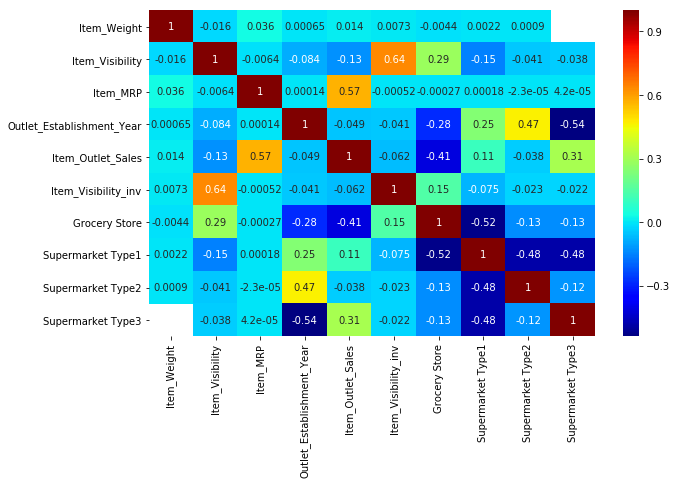

In [62]:
sns.heatmap(corr_mat, cmap="jet", annot=True)

Como era de esperar, las ventas tienen gran relación con:
  * Item_MRP
  * Supermercado Tipo3
  

Podríamos revisar si vale la pena crear más variables dummies a partir de otras variables categóricas como el tamaño de la tienda o el ID de la tienda, pero ambas estan correlacionadas con el tipo de tienda

In [63]:
data.dtypes.get_values()

array([dtype('O'), dtype('float64'), dtype('O'), dtype('float64'),
       dtype('O'), dtype('float64'), dtype('O'), dtype('int64'),
       dtype('O'), dtype('O'), dtype('O'), dtype('float64'), dtype('O'),
       dtype('float64')], dtype=object)

In [64]:
cat_columns = [x for x in data.columns if data[x].dtypes == "O"]
cat_columns

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Item_Type_cat']

In [65]:
cat_columns.remove("Item_Identifier")

In [66]:
cat_dum = pd.get_dummies(data[cat_columns])
data_extra = pd.concat([data,cat_dum], axis=1)
extra_corr_mat = data_extra.corr()
extra_corr_mat["Item_Outlet_Sales"].sort_values(ascending=False)

Item_Outlet_Sales                  1.000000
Item_MRP                           0.567574
Outlet_Type_Supermarket Type3      0.311192
Outlet_Identifier_OUT027           0.311192
Outlet_Size_Medium                 0.204701
Outlet_Type_Supermarket Type1      0.108765
Outlet_Location_Type_Tier 2        0.058261
Outlet_Identifier_OUT035           0.052823
Outlet_Location_Type_Tier 3        0.046376
Outlet_Identifier_OUT049           0.034264
Outlet_Identifier_OUT017           0.032610
Item_Type_Fruits and Vegetables    0.025950
Outlet_Identifier_OUT013           0.024170
Outlet_Size_High                   0.024170
Item_Type_cat_Food                 0.023130
Item_Type_Snack Foods              0.022782
Outlet_Identifier_OUT046           0.019803
Item_Fat_Content_Reg               0.018719
Item_Type_Household                0.015701
Item_Type_Starchy Foods            0.015039
Item_Weight                        0.014123
Item_Type_Dairy                    0.008858
Item_Type_Canned                

# Limipando datos faltantes

## Outlet Size

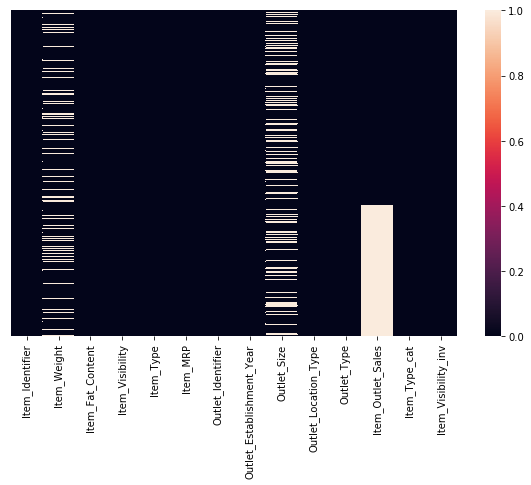

In [67]:
sns.heatmap(data.isna(), yticklabels=False)

### Outlet Size

In [68]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Item_Type_cat',
       'Item_Visibility_inv'],
      dtype='object')

In [69]:
data.fillna({"Outlet_Size": "NaN"})\
.groupby(["Outlet_Type", "Outlet_Identifier", "Outlet_Location_Type", "Outlet_Size"])\
.count()["Item_Type"]

Outlet_Type        Outlet_Identifier  Outlet_Location_Type  Outlet_Size
Grocery Store      OUT010             Tier 3                NaN             925
                   OUT019             Tier 1                Small           880
Supermarket Type1  OUT013             Tier 3                High           1553
                   OUT017             Tier 2                NaN            1543
                   OUT035             Tier 2                Small          1550
                   OUT045             Tier 2                NaN            1548
                   OUT046             Tier 1                Small          1550
                   OUT049             Tier 1                Medium         1550
Supermarket Type2  OUT018             Tier 3                Medium         1546
Supermarket Type3  OUT027             Tier 3                Medium         1559
Name: Item_Type, dtype: int64

Las 2 grocery stores que tenemos se comportan de forma muy similar en todos los aspectos que vimos. Por lo tanto podemos decir que el tamaño de la tienda TC010 es Small
El caso de los Supermercados tipo 1 es menos claro. Lo imputamos con la moda, es decir la cateogria más probable.


In [70]:
mask = data["Outlet_Type"] == "Supermarket Type1"
data[mask]["Outlet_Size"].mode()

0    Small
dtype: object

In [71]:
mask = data["Outlet_Type"] == "Supermarket Type1"
outlet_size_mode = data[mask]["Outlet_Size"].mode()
data.loc[mask,"Outlet_Size"] = data.loc[mask,"Outlet_Size"].fillna(outlet_size_mode[0])

mask = data["Outlet_Type"] == "Grocery Store"
data.loc[mask,"Outlet_Size"] = data.loc[mask,"Outlet_Size"].fillna("Small")

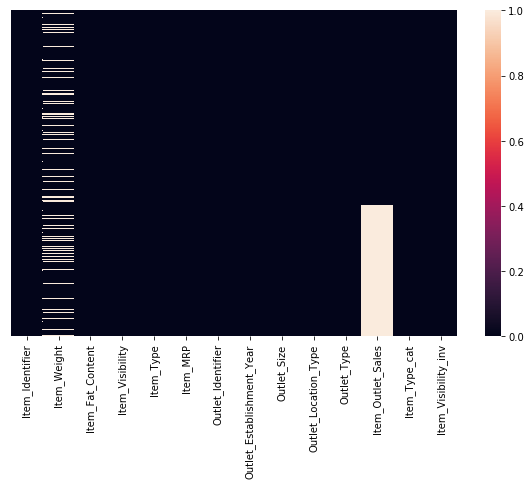

In [72]:
sns.heatmap(data.isna(), yticklabels=False)

In [73]:
data.fillna({"Outlet_Size": "NaN"})\
.groupby(["Outlet_Type", "Outlet_Identifier", "Outlet_Location_Type", "Outlet_Size"])\
.count()["Item_Type"]

Outlet_Type        Outlet_Identifier  Outlet_Location_Type  Outlet_Size
Grocery Store      OUT010             Tier 3                Small           925
                   OUT019             Tier 1                Small           880
Supermarket Type1  OUT013             Tier 3                High           1553
                   OUT017             Tier 2                Small          1543
                   OUT035             Tier 2                Small          1550
                   OUT045             Tier 2                Small          1548
                   OUT046             Tier 1                Small          1550
                   OUT049             Tier 1                Medium         1550
Supermarket Type2  OUT018             Tier 3                Medium         1546
Supermarket Type3  OUT027             Tier 3                Medium         1559
Name: Item_Type, dtype: int64

## Item Weight

In [74]:
data\
.groupby(["Outlet_Type", "Outlet_Identifier", "Outlet_Location_Type", "Outlet_Size"])\
.count()[["Item_Weight","Item_Type"]]

Item_Weight  \
Outlet_Type       Outlet_Identifier Outlet_Location_Type Outlet_Size                
Grocery Store     OUT010            Tier 3               Small                925   
                  OUT019            Tier 1               Small                  0   
Supermarket Type1 OUT013            Tier 3               High                1553   
                  OUT017            Tier 2               Small               1543   
                  OUT035            Tier 2               Small               1550   
                  OUT045            Tier 2               Small               1548   
                  OUT046            Tier 1               Small               1550   
                  OUT049            Tier 1               Medium              1550   
Supermarket Type2 OUT018            Tier 3               Medium              1546   
Supermarket Type3 OUT027            Tier 3               Medium                 0   

                                                                      Item_Type  
Outlet_Type       Outlet_Identifier Outlet_Location_Type Outlet_Size             
Grocery Store     OUT010            Tier 3               Small              925  
                  OUT019            Tier 1               Small              880  
Supermarket Type1 OUT013            Tier 3               High              1553  
                  OUT017            Tier 2               Small             1543  
                  OUT035            Tier 2               Small             1550  
                  OUT045            Tier 2               Small             1548  
                  OUT046            Tier 1               Small             1550  
                  OUT049            Tier 1               Medium            1550  
Supermarket Type2 OUT018            Tier 3               Medium            1546  
Supermarket Type3 OUT027            Tier 3               Medium            1559

Vemos que los productos de las tiendas OUT027 y OUT019 son los que no tienen los pesos.
Ahora los productos estan identificados, puede ser que haya pesos faltantes para productos que se su peso por estar etiquetados en otra tienda?

In [75]:
aux2 = data[["Item_Identifier", "Item_Weight", "Item_Type"]].groupby("Item_Identifier").count()

In [76]:
print(aux2[aux2["Item_Weight"] != aux2["Item_Type"]].shape)
aux2[aux2["Item_Weight"] != aux2["Item_Type"]].head(10)

(1559, 2)


,Item_Weight,Item_Type
Item_Identifier,,
DRA12,8,9
DRA24,8,10
DRA59,8,10
DRB01,6,8
DRB13,8,9
DRB24,7,8
DRB25,8,10
DRB48,8,9
DRC01,8,9


Tengo informacion del peso de esos prodcutos en otra tienda.
Son en todas las tiendas iguales esos pesos?

In [77]:
aux = data[["Item_Identifier", "Item_Weight"]].groupby("Item_Identifier").std()

In [78]:
aux[aux["Item_Weight"] != 0]

,Item_Weight
Item_Identifier,


Si en todas las tiendas tienen el mismo peso

Veo que si, entonces los NaN del peso, lo reemplazo usando el peso de otro producto que tenga el mismo identificador

In [79]:
# Round is needed in order to preserve the std equal to 0
data["Item_Weight"] = data[["Item_Identifier", "Item_Weight"]].groupby("Item_Identifier")\
                                        .transform(lambda x: x.fillna(round(x.mean(),5)) )

Todos los productos deberian continuar teniendo el mismo peso

In [80]:
aux = data[["Item_Identifier", "Item_Weight"]].groupby("Item_Identifier").std()
aux[aux["Item_Weight"] != 0]

,Item_Weight
Item_Identifier,


## Item_Outlet_Sales

En la mayorias de los problemas, esta columna sería el label / output de interes. Como tengo datos faltantes en esta columna, estoy ante un problema semi-supervisado, el cual podría resolverse utulizando Pseudo-Labeling (https://datawhatnow.com/pseudo-labeling-semi-supervised-learning/)






# Conclusiones

Después de analizar y limpiar los datos, debemos remarcar algunos puntos importantes. Las siguientes columnas o categorías nos aportan mucha información sobre las ventas:
  * Item MRP
  * Supertmarket Type 3 o Outlet Identifier OUT027 (son lo mismo)
  * Outlet Size Medium (se explica más que nada por que Supermarket Type 3 es de tamaño Medium)
  * Supertmarket Type 1 (después del Type 3 es el que más ventas tiene)
  * Grocery Store o Outlet Identifier OUT019 y OUT010 (que es lo mismo)
  * Item Visibility
  * El ID del producto también aporta información útil de como son las ventas, pero las muestras son pequeñas y pueden tener información muy sesgada

Al haber datos faltantes en la columna "Item Outlet Sales" estamos frente a un problema semi supervisado y debemos procder de acuerdo a eso.

Para poder mejorar el analisis de los datos, sería útil tener fecha y hora de las observaciones, nos podría marcar que tipo de productos se compran más por la mañana y cuales más por la tarde. También que productos se consumen más en invierno o verano.




  